In [107]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download

In [108]:
#Function for heatmap
def netflix_heatmap(matrix,matrix_xticks,matrix_yticks,labels):
  '''
  Defined function creates a heatmap with the given data.

  Parameters
  ----------
  matrix : pandas.DataFrame or numpy.ndarray
       Matrix containing data for visualising via heatmap.
  matrix_xticks : List
       List of matrix indexes for X-axis.
  matrix_yticks : List
       List of matrix indexes for Y-axis.
  labels : List
       List of labels for heatmap.

  Returns
  -------
  Matplotlib heatmap.

  '''
  plt.figure(figsize=(6,6))
  plt.imshow(matrix,cmap='gist_rainbow_r')
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, f"{matrix[i, j]:.2f}", ha="center", va="center",
                 color="b")
  plt.xticks(range(len(matrix_xlabel)), matrix_xlabel, rotation=90)
  plt.yticks(range(len(matrix_ylabel)), matrix_ylabel)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.title(labels[2])
  plt.savefig(labels[2]+'.png')
  plt.show()

In [109]:
#Function for bar graph
def netflix_bar(x,y,labels):
  '''
  Defined function creates a bar graph with the given data.

  Parameters
  ----------
  x : List
       List of x-axis values.
  y : List
       List of y-axis values.
  labels : List
       List of labels for bar graph.

  Returns
  -------
  Matplotlib bar graph.

  '''
  plt.figure()
  bars = plt.bar(x,y,color='m')
  for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             ha='center', va='bottom')
  plt.xticks(x,rotation=90)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.title(labels[2])
  plt.savefig(labels[2]+'.png')
  plt.show()

In [110]:
#Function for line plot
def netflix_lineplot(x,y,labels):
  '''
  Defined function creates a line plot with the given data.

  Parameters
  ----------
  x : List
       List of x-axis values.
  y : List
       List of y-axis values.
  labels : List
       List of labels for line plot.

  Returns
  -------
  Matplotlib line plot.
  '''
  plt.figure()
  plt.plot(x,y)
  plt.xticks(x,rotation=90)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.title(labels[2])
  plt.savefig(labels[2]+'.png')
  plt.show()

In [111]:
#Reading data from drive
netflix = pd.read_csv(
    '/content/drive/MyDrive/Data/Netflix TV Shows and Movies.csv',
    index_col='index')

#Displaying the first 5 rows of the data
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [112]:
#Describing the data
netflix.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


In [113]:
#Looking for missing values
print('Null values before cleaning')
print(netflix.isna().sum())

#Cleaning the data
netflix = netflix.dropna()
print('Null values after cleaning')
print(netflix.isna().sum())

Null values before cleaning
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64
Null values after cleaning
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64


In [121]:
#Describing the data
netflix.describe()

,release_year,runtime,imdb_score,imdb_votes
count,2987.000000,2987.000000,2987.000000,2.987000e+03
mean,2015.542015,68.626046,6.731302,3.759691e+04
std,7.043580,40.313122,1.129564,1.124525e+05
min,1964.000000,0.000000,1.600000,5.000000e+00
25%,2014.000000,35.000000,6.100000,8.905000e+02
50%,2018.000000,56.000000,6.800000,4.246000e+03
75%,2020.000000,100.000000,7.500000,2.316050e+04
max,2022.000000,229.000000,9.600000,2.268288e+06


In [114]:
#Looking for correlation between quantitative data
netflix[['runtime','imdb_score','imdb_votes']].corr()

,runtime,imdb_score,imdb_votes
runtime,1.000000,-0.137332,0.246017
imdb_score,-0.137332,1.000000,0.204240
imdb_votes,0.246017,0.204240,1.000000


In [115]:
#Counting number of titles by type and age certification
netflix.groupby(['type','age_certification'])['id'].count()

type   age_certification
MOVIE  G                    105
       NC-17                 13
       PG                   236
       PG-13                418
       R                    546
SHOW   TV-14                436
       TV-G                  72
       TV-MA                792
       TV-PG                172
       TV-Y                  93
       TV-Y7                104
Name: id, dtype: int64

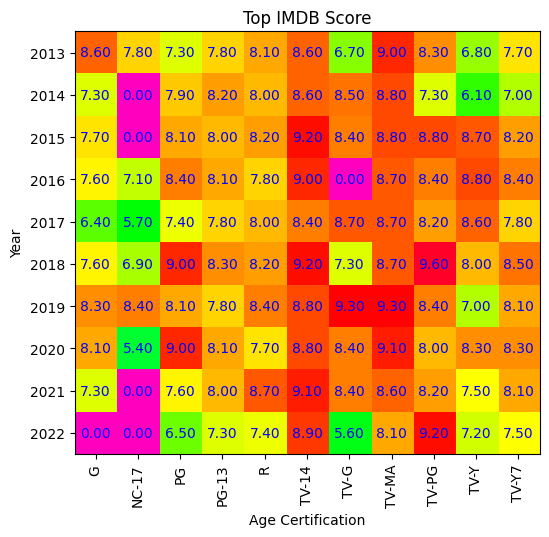

In [116]:
#Finding the top IMDB score over last 10 years for different age certifications
yearly_rating_imdb_score = netflix[netflix['release_year']>=2013].pivot_table(
    values='imdb_score',
    index='release_year',
    columns='age_certification',
    aggfunc='max'
)

#Filling the missing IMDB scores with 0
yearly_rating_imdb_score = yearly_rating_imdb_score.fillna(0)

#Creating matrix, axis lables and values for Heatmap
matrix = yearly_rating_imdb_score.values
matrix_xlabel = yearly_rating_imdb_score.columns
matrix_ylabel = yearly_rating_imdb_score.index
heatmap_labels = ['Age Certification','Year','Top IMDB Score']

#Heatmap for top IMDB score over last 10 years
netflix_heatmap(matrix,matrix_xlabel,matrix_ylabel,heatmap_labels)



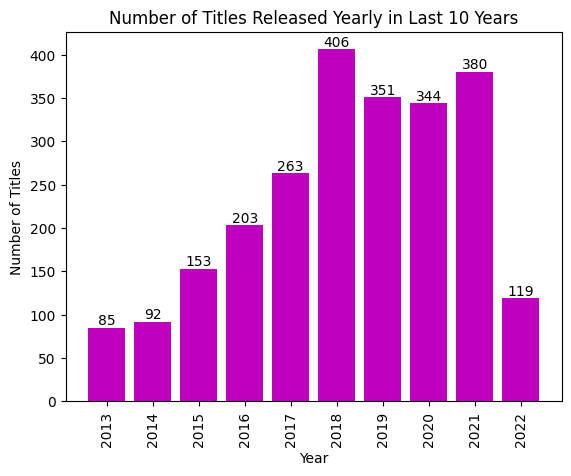

In [117]:
#Finding the number of titles released yearly in last 10 years
year_titles = netflix.groupby(['release_year'])['id'].count()

#Creating lists of values and labels for bar graph
bar_x = year_titles.index[-10:]
bar_y = year_titles.values[-10:]
bar_labels = ['Year','Number of Titles',
              'Number of Titles Released Yearly in Last 10 Years']

#Bar graph for showing number of titles released each year for last 10 years
netflix_bar(bar_x,bar_y,bar_labels)

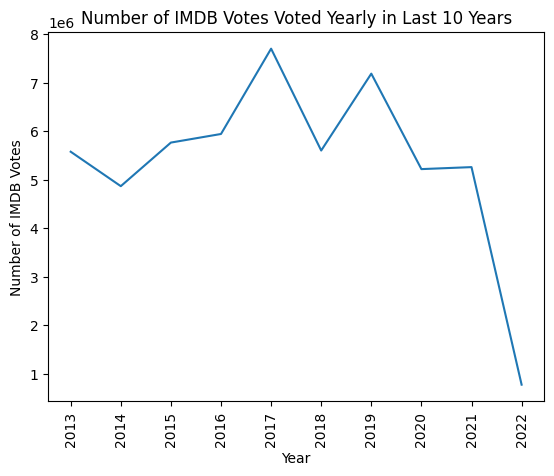

In [118]:
#Total number of IMDB votes received yearly in last 10 years
year_score = netflix.groupby(['release_year'])['imdb_votes'].sum()

#Creating list of values and labels for line plot
lineplot_x=year_score.index[-10:]
lineplot_y=year_score.values[-10:]
lineplot_labels = ['Year','Number of IMDB Votes',
                   'Number of IMDB Votes Voted Yearly in Last 10 Years']

#Line plot for showing number of Votes voted yearly for last 10 years
netflix_lineplot(lineplot_x,lineplot_y,lineplot_labels)



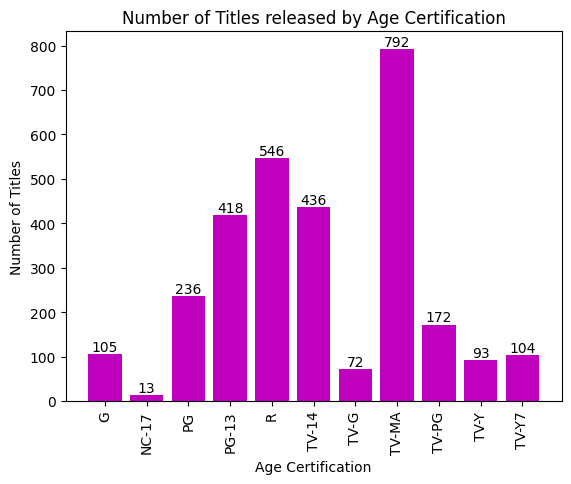

In [119]:
#Finding the number of titles released by different age certificates
age_cert = netflix.groupby(['age_certification'])['id'].count()

#Creating lists of values and labels for bar graph
bar_x = age_cert.index
bar_y = age_cert.values
bar_labels = ['Age Certification','Number of Titles',
              'Number of Titles released by Age Certification']

#Bar graph for showing number of titles released by different age certificates
netflix_bar(bar_x,bar_y,bar_labels)

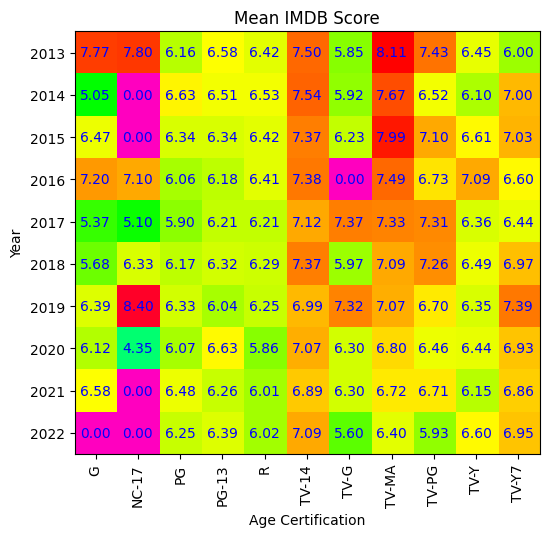

In [120]:
#Finding the mean IMDB score over last 10 years for different age certifications
yearly_rating_imdb_score = netflix[netflix['release_year']>=2013].pivot_table(
    values='imdb_score',
    index='release_year',
    columns='age_certification',
    aggfunc='mean'
)

#Filling the missing IMDB scores with 0
yearly_rating_imdb_score = yearly_rating_imdb_score.fillna(0)

#Creating matrix, axis lables and values for Heatmap
matrix = yearly_rating_imdb_score.values
matrix_xlabel = yearly_rating_imdb_score.columns
matrix_ylabel = yearly_rating_imdb_score.index
heatmap_labels = ['Age Certification','Year','Mean IMDB Score']

#Heatmap for mean IMDB score over last 10 years
netflix_heatmap(matrix,matrix_xlabel,matrix_ylabel,heatmap_labels)